In [1]:
import matplotlib.pyplot as plt

# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical computing
import numpy as np

import seaborn as sns

In [2]:
df_credit_fraud = pd.read_csv("card_transdata.csv")
df_credit_fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#_ Apply log transformation
df_credit_fraud['log_distance_from_home'] = np.log(df_credit_fraud['distance_from_home'])
df_credit_fraud['log_distance_from_last_transaction'] = np.log(df_credit_fraud['distance_from_last_transaction'])
df_credit_fraud['log_ratio_to_median_purchase_price'] = np.log(df_credit_fraud['ratio_to_median_purchase_price'])

In [6]:
variables = ['log_distance_from_home','log_distance_from_last_transaction','log_ratio_to_median_purchase_price']

df_credit_fraud[variables].describe()

,log_distance_from_home,log_distance_from_last_transaction,log_ratio_to_median_purchase_price
count,1000000.000000,1000000.000000,1000000.000000
mean,2.300552,-0.002716,-0.001872
std,1.401657,1.799386,1.098468
min,-5.323761,-9.042442,-5.426324
25%,1.355322,-1.215133,-0.743024
50%,2.299356,-0.001351,-0.002286
75%,3.248201,1.210675,0.740207
max,9.271692,9.380176,5.590251


In [7]:
# Create separate dataframes for each category
df_not_fraud = df_credit_fraud[df_credit_fraud['fraud'] == 0]
df_is_fraud = df_credit_fraud[df_credit_fraud['fraud'] == 1]

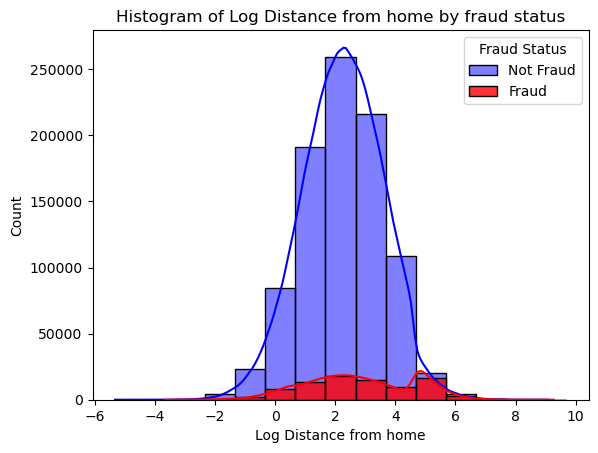

In [8]:
# Define the range of the bins
binrange = (min(df_not_fraud["log_distance_from_home"].min(), df_is_fraud["log_distance_from_home"].min()), 
            max(df_not_fraud["log_distance_from_home"].max(), df_is_fraud["log_distance_from_home"].max()))

# Create histograms
sns.histplot(data=df_not_fraud, x="log_distance_from_home", color='blue', binwidth=1, alpha=0.5, edgecolor="black", linewidth=1, kde=True, binrange=binrange, label='Not Fraud')
sns.histplot(data=df_is_fraud, x="log_distance_from_home", color='red', binwidth=1, alpha=0.8, edgecolor="black", linewidth=1, kde=True, binrange=binrange, label='Fraud')

# Add labels and title
plt.xlabel("Log Distance from home")
plt.ylabel("Count")
plt.title("Histogram of Log Distance from home by fraud status")

# Add a legend
plt.legend(title="Fraud Status")

# Show the plot
plt.show()

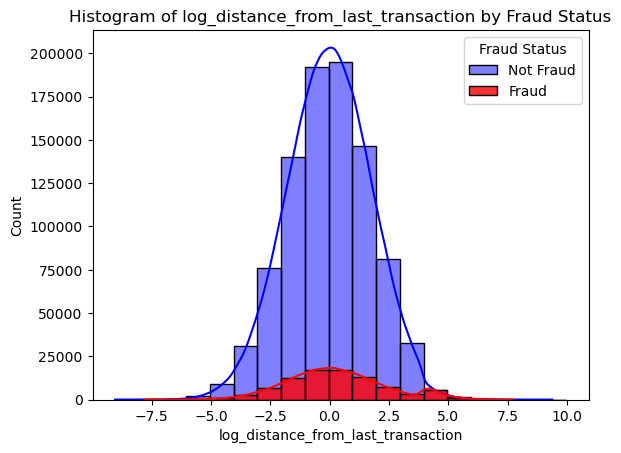

In [10]:
# Define the range of the bins
binrange = (min(df_not_fraud["log_distance_from_last_transaction"].min(), df_is_fraud["log_distance_from_last_transaction"].min()), 
            max(df_not_fraud["log_distance_from_last_transaction"].max(), df_is_fraud["log_distance_from_last_transaction"].max()))

# Create histograms
sns.histplot(data=df_not_fraud, x="log_distance_from_last_transaction", color='blue', binwidth=1, alpha=0.5, edgecolor="black", linewidth=1, kde=True, binrange=binrange, label='Not Fraud')
sns.histplot(data=df_is_fraud, x="log_distance_from_last_transaction", color='red', binwidth=1, alpha=0.8, edgecolor="black", linewidth=1, kde=True, binrange=binrange, label='Fraud')

# Add labels and title
plt.xlabel("log_distance_from_last_transaction")
plt.ylabel("Count")
plt.title("Histogram of log_distance_from_last_transaction by Fraud Status")

# Add a legend
plt.legend(title="Fraud Status")

# Show the plot
plt.show()

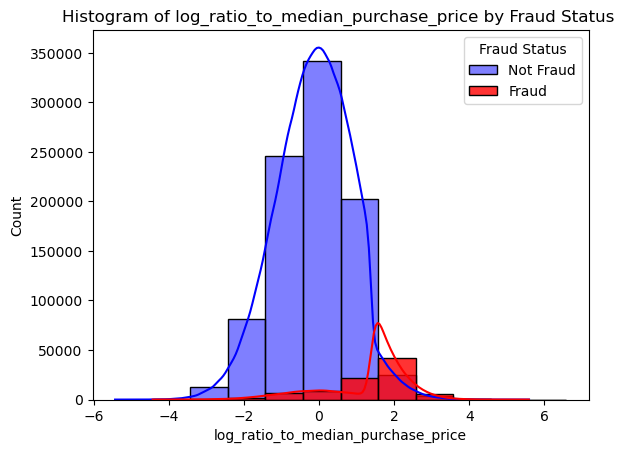

In [11]:
# Define the range of the bins
binrange = (min(df_not_fraud["log_ratio_to_median_purchase_price"].min(), df_is_fraud["log_ratio_to_median_purchase_price"].min()), 
            max(df_not_fraud["log_ratio_to_median_purchase_price"].max(), df_is_fraud["log_ratio_to_median_purchase_price"].max()))
# Create histograms
sns.histplot(data=df_not_fraud, x="log_ratio_to_median_purchase_price", color='blue', binwidth=1, alpha=0.5, edgecolor="black", linewidth=1, kde=True, binrange=binrange, label='Not Fraud')
sns.histplot(data=df_is_fraud, x="log_ratio_to_median_purchase_price", color='red', binwidth=1, alpha=0.8, edgecolor="black", linewidth=1, kde=True, binrange=binrange, label='Fraud')

# Add labels and title
plt.xlabel("log_ratio_to_median_purchase_price")
plt.ylabel("Count")
plt.title("Histogram of log_ratio_to_median_purchase_price by Fraud Status ")

# Add a legend
plt.legend(title="Fraud Status")

# Show the plot
plt.show()